# **EDA**

We're going to answer the following questions:

1) In which city there are maximum number of restaurants?

2) How do Ranking vary across different Cities and which City has Highest ranking?

3) Which Cuisine Style is most Common in all Restraunts?

In [5]:
#import libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
from matplotlib import pyplot as plot
%matplotlib inline
import os
import plotly.graph_objs as go
import plotly.offline as py
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_df=pd.read_csv("TA_restaurants_curated.csv")                           #Getting the Data

In [ ]:
train_df.head()              #lets have a look at the dataset

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [ ]:
train_df.dtypes

Unnamed: 0             int64
Name                  object
City                  object
Cuisine Style         object
Ranking              float64
Rating               float64
Price Range           object
Number of Reviews    float64
Reviews               object
URL_TA                object
ID_TA                 object
dtype: object

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         125527 non-null  int64  
 1   Name               125527 non-null  object 
 2   City               125527 non-null  object 
 3   Cuisine Style      94176 non-null   object 
 4   Ranking            115876 non-null  float64
 5   Rating             115897 non-null  float64
 6   Price Range        77672 non-null   object 
 7   Number of Reviews  108183 non-null  float64
 8   Reviews            115911 non-null  object 
 9   URL_TA             125527 non-null  object 
 10  ID_TA              125527 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [ ]:
train_df.shape

(125527, 11)

In [ ]:
train_df.describe(include="all")

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
count,125527.000000,125527,125527,94176,115876.000000,115897.000000,77672,108183.000000,115911,125527,125527
unique,NaN,111927,31,20971,NaN,NaN,3,NaN,96696,125326,125326
top,NaN,McDonald's,London,['Italian'],NaN,NaN,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187514-d3692974-Reviews-El...,d991500
freq,NaN,326,18212,3473,NaN,NaN,54360,NaN,19094,2,2
mean,3974.686131,NaN,NaN,NaN,3657.463979,3.987441,NaN,125.184983,NaN,NaN,NaN
std,4057.687698,NaN,NaN,NaN,3706.255301,0.678814,NaN,310.833311,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,1.000000,-1.000000,NaN,2.000000,NaN,NaN,NaN
25%,1042.000000,NaN,NaN,NaN,965.000000,3.500000,NaN,9.000000,NaN,NaN,NaN
50%,2445.000000,NaN,NaN,NaN,2256.000000,4.000000,NaN,32.000000,NaN,NaN,NaN
75%,5626.000000,NaN,NaN,NaN,5237.000000,4.500000,NaN,114.000000,NaN,NaN,NaN


### We select only a small number of features as the others we can discard for this study

In [8]:
DataSet= train_df.copy()[['Name',	'City',	'Cuisine Style',	'Ranking',	'Rating', 'Price Range']]

In [9]:
# drop duplicates
DataSet = DataSet.drop_duplicates(subset=['Name'])
DataSet = DataSet.dropna()

In [ ]:
# Lets see the cardinality and rare labels
print("City Names :\n", DataSet["City"].value_counts())           
print("Cuisine Style Names are :\n", DataSet["Cuisine Style"].value_counts())
print("Ranking Values are :\n", DataSet["Ranking"].value_counts())
print("Different Ratings are :\n", DataSet["Rating"].value_counts())

City Names :
 London        15091
Paris         12742
Madrid         8206
Barcelona      7972
Berlin         6685
Milan          6022
Rome           5361
Prague         4244
Lisbon         3786
Amsterdam      3343
Vienna         3299
Brussels       2992
Hamburg        2825
Lyon           2612
Munich         2551
Budapest       2485
Stockholm      2362
Warsaw         2014
Copenhagen     1946
Dublin         1891
Athens         1873
Edinburgh      1702
Oporto         1485
Geneva         1434
Zurich         1431
Krakow         1271
Helsinki       1138
Oslo           1081
Bratislava     1031
Luxembourg      577
Ljubljana       475
Name: City, dtype: int64
Cuisine Style Names are :
 ['Italian']                                                                                                                   3100
['French']                                                                                                                    2313
['Spanish']                                         

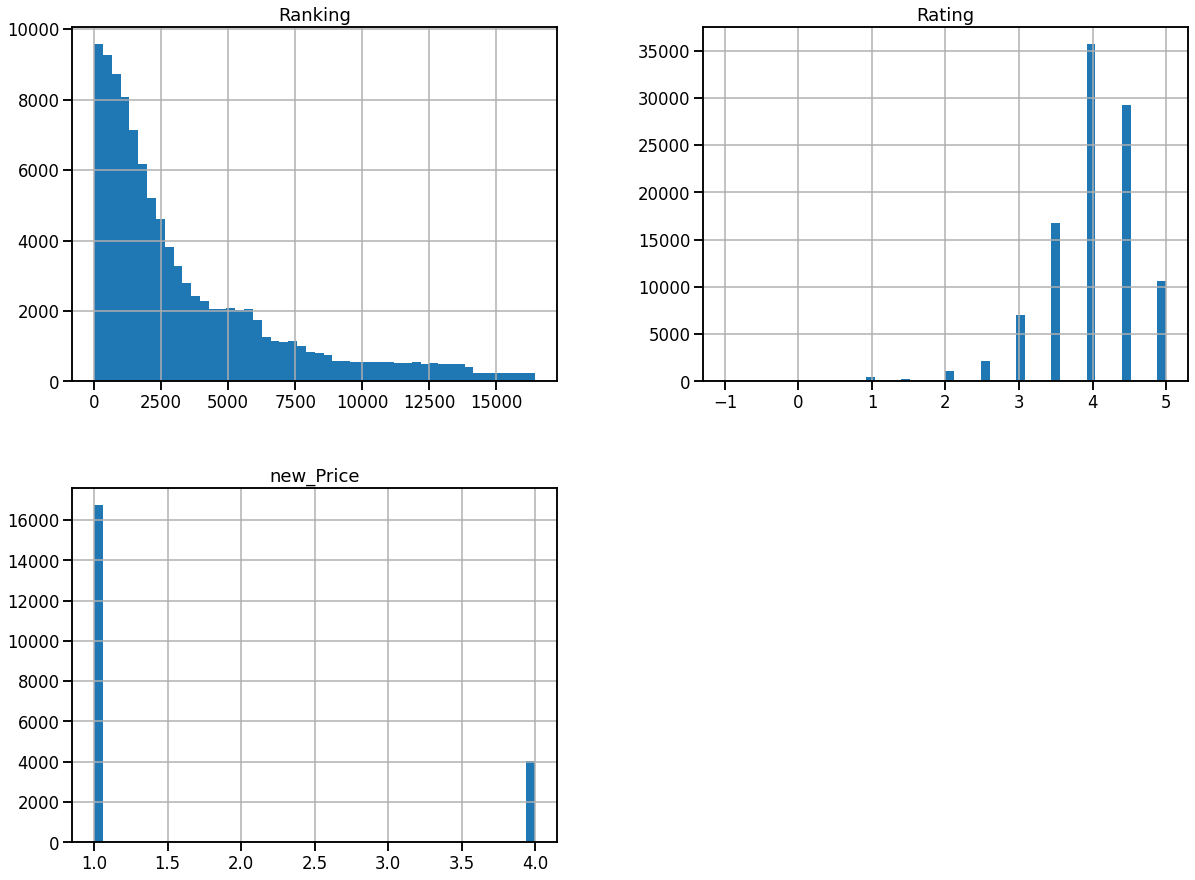

In [ ]:
# Data Exploration - Let's explore 
try:
    # We select all rows and all columns after the Name Column
    DataSet.iloc[:,1:].hist(bins=50, figsize=(20,15))
    plot.show()
except AttributeError:
    pass

#### **Lets have a look at cities having maximum number of restraunts**

Top 10 City Wise Count 

London       11622
Paris         9281
Barcelona     5079
Madrid        4685
Rome          4654
Milan         3737
Berlin        3438
Prague        2527
Amsterdam     2426
Lisbon        2386
Name: City, dtype: int64


Text(0.5, 0, 'City')

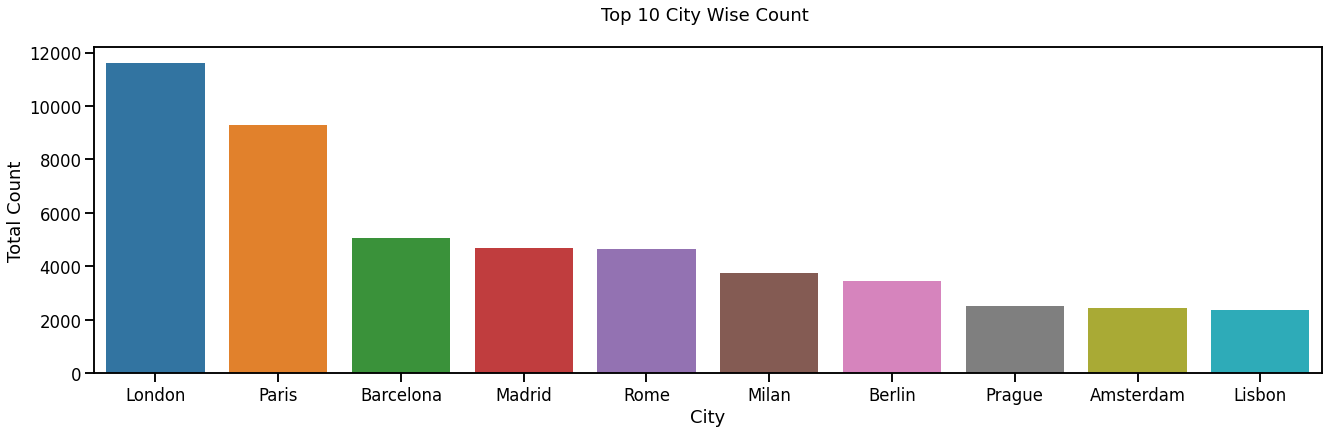

In [ ]:
ItemCount = DataSet["City"].value_counts().nlargest(10)
print("Top 10 City Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
plot.figure(figsize=(22,6))
sns.countplot(DataSet['City'],order = DataSet['City'].value_counts().nlargest(10).index)
plot.title('Top 10 City Wise Count \n')
plot.ylabel('Total Count')
plot.xlabel('City')

Text(0.5, 1.0, 'NO. of restaurants in a City')

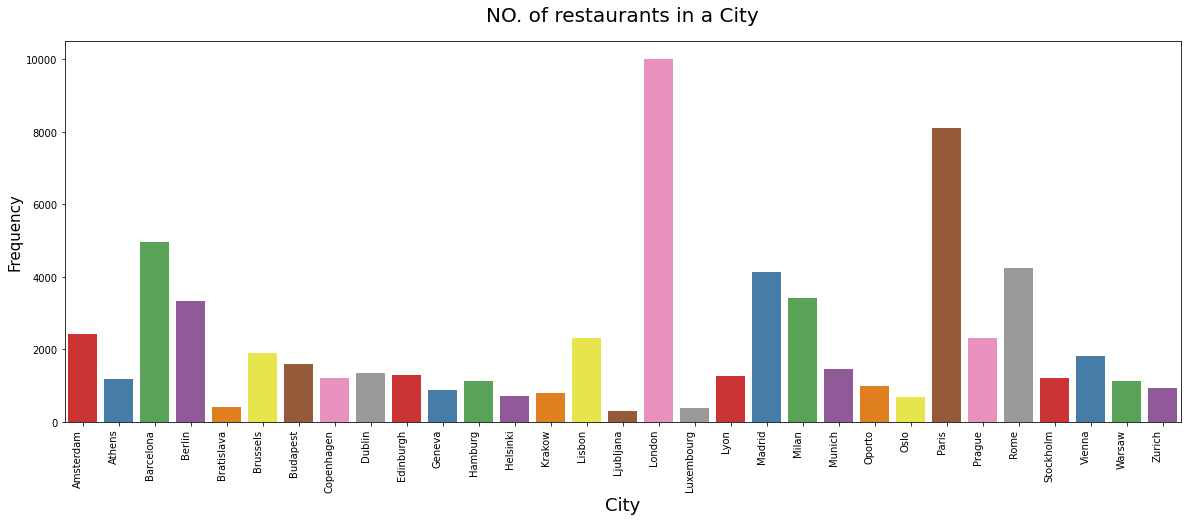

In [11]:
fig = plot.figure(figsize=(20,7))
loc = sns.countplot(x="City",data=DataSet, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plot.ylabel("Frequency",size=15)
plot.xlabel("City",size=18)
loc
plot.title('No. of restaurants in a City',size = 20,pad=20)

So after this city wise count, we can say that maximum number of restraunts are present in **london**.

#### **Ranking for Top 15 Cities with graph**

Ranking for Top 15 City

City
London       77939244.0
Paris        52014713.0
Barcelona    15785237.0
Madrid       15505028.0
Rome         11861130.0
Milan         8701842.0
Berlin        7936022.0
Prague        4091518.0
Lisbon        3472665.0
Amsterdam     3266293.0
Vienna        2672472.0
Brussels      2502024.0
Munich        1786206.0
Budapest      1641301.0
Lyon          1373003.0
Name: Ranking, dtype: float64


Text(0.5, 0, 'City Name')

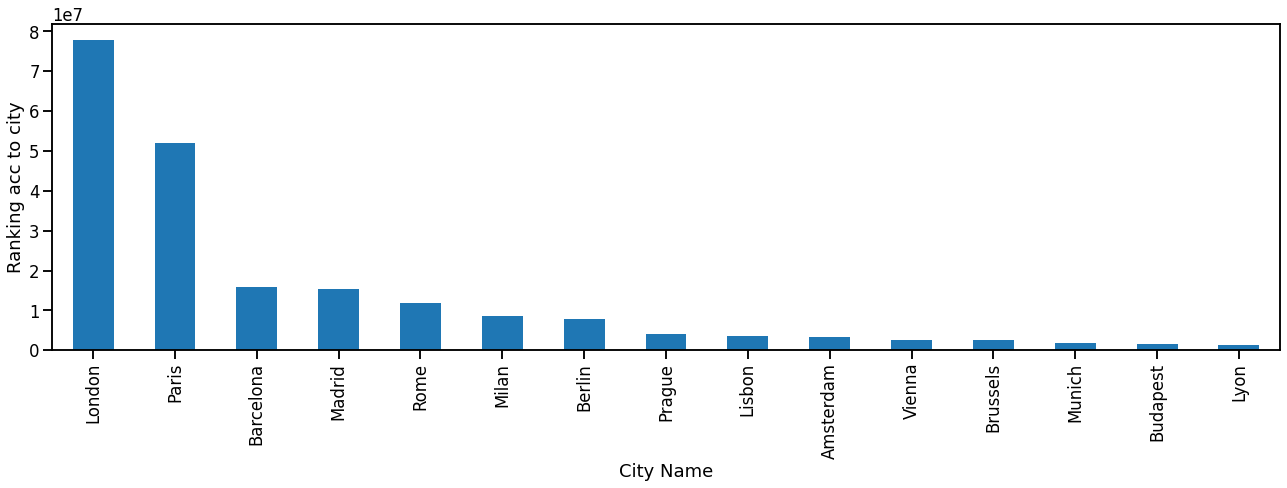

In [ ]:
Ranking_City = DataSet.groupby(['City'])['Ranking'].sum().nlargest(15)
print("Ranking for Top 15 City\n")
print(Ranking_City)
plot.figure(figsize=(22,6))
GraphData=DataSet.groupby(['City'])['Ranking'].sum().nlargest(15)
GraphData.plot(kind='bar')
plot.ylabel('Ranking acc to city')
plot.xlabel('City Name')

We can conclude that **London and Paris** have the highest rankings

#### **lets see which are popular Cuisine Styles**

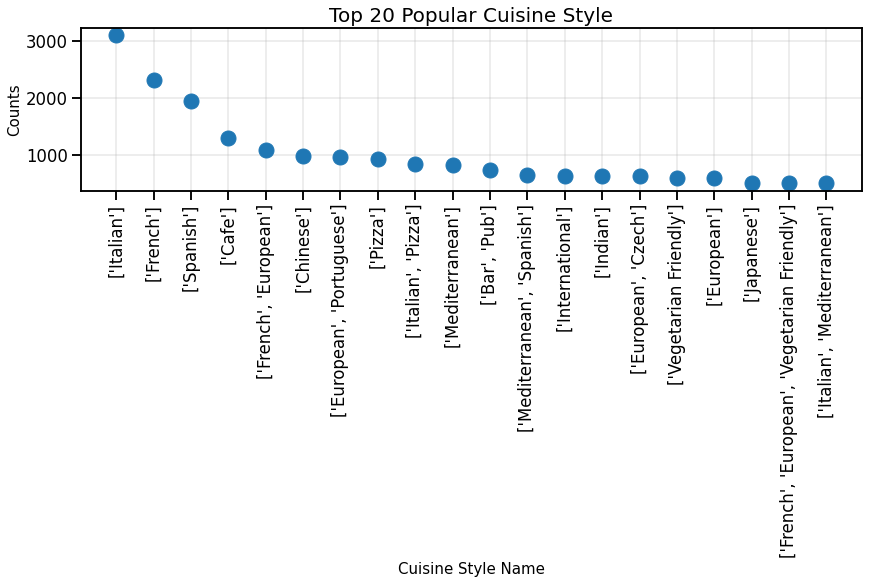

In [ ]:
Cuisine = DataSet['Cuisine Style'].value_counts()
plot.figure(figsize=(14,3))
plot.plot(Cuisine.head(20), linestyle='none', markersize=15, marker='o')
plot.title('Top 20 Popular Cuisine Style', fontsize=20)
plot.xticks(rotation=90)
plot.xlabel('Cuisine Style Name', fontsize=15)
plot.ylabel('Counts', fontsize=15)
plot.grid(alpha=.3)
plot.margins(.05)
plot.show()

##### **Cuisine Style percentage wise Pie Chart**

In [ ]:
Cuisine = DataSet["Cuisine Style"].value_counts().nlargest(15)            #percentage for top 15 popular Cuisine Style
labels = (np.array(Cuisine.index))
sizes = (np.array((Cuisine / Cuisine.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Cuisine Style")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Cuisine Style")

We can conclude that **'Italian', 'French' and 'Spanish'** are the cuisine style's serveed in most of the restraunts

#### **Unique Price Range**

In [ ]:
UniquePrice_Range = DataSet['Price Range'].unique()
print("All Price Range  \n")
print(UniquePrice_Range)

All Price Range  

['$$ - $$$' '$$$$' '$' nan]


The price field currently has the "$" in it and is a string. So lets remove it and convert it to a float datatype.

In [ ]:
DataSet['new_Price'] = DataSet['Price Range'].fillna("0")

In [ ]:
Price={'$' :1,
        '$$' : 2,
       '$$$' : 3,
       '$$$$' : 4}
DataSet['new_Price']=DataSet['Price Range'].map(Price)
DataSet.drop('Price Range',axis=1)

,Name,City,Cuisine Style,Ranking,Rating,new_Price
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,NaN
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,4.0
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,4.0
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,4.0
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,4.0
...,...,...,...,...,...,...
125522,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN
125523,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN
125524,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN
125525,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN


Cuisine_vs_Price 

Cuisine Style
['Italian']                                                                              922.0
['French']                                                                               783.0
['French', 'European']                                                                   650.0
['Spanish']                                                                              560.0
['Cafe']                                                                                 424.0
['French', 'European', 'Vegetarian Friendly']                                            407.0
['European', 'Portuguese']                                                               380.0
['Mediterranean']                                                                        334.0
['Pizza']                                                                                294.0
['International']                                                                        287.0
['Italian', 'Pizz

Text(0.5, 0, 'Cuisine_Style')

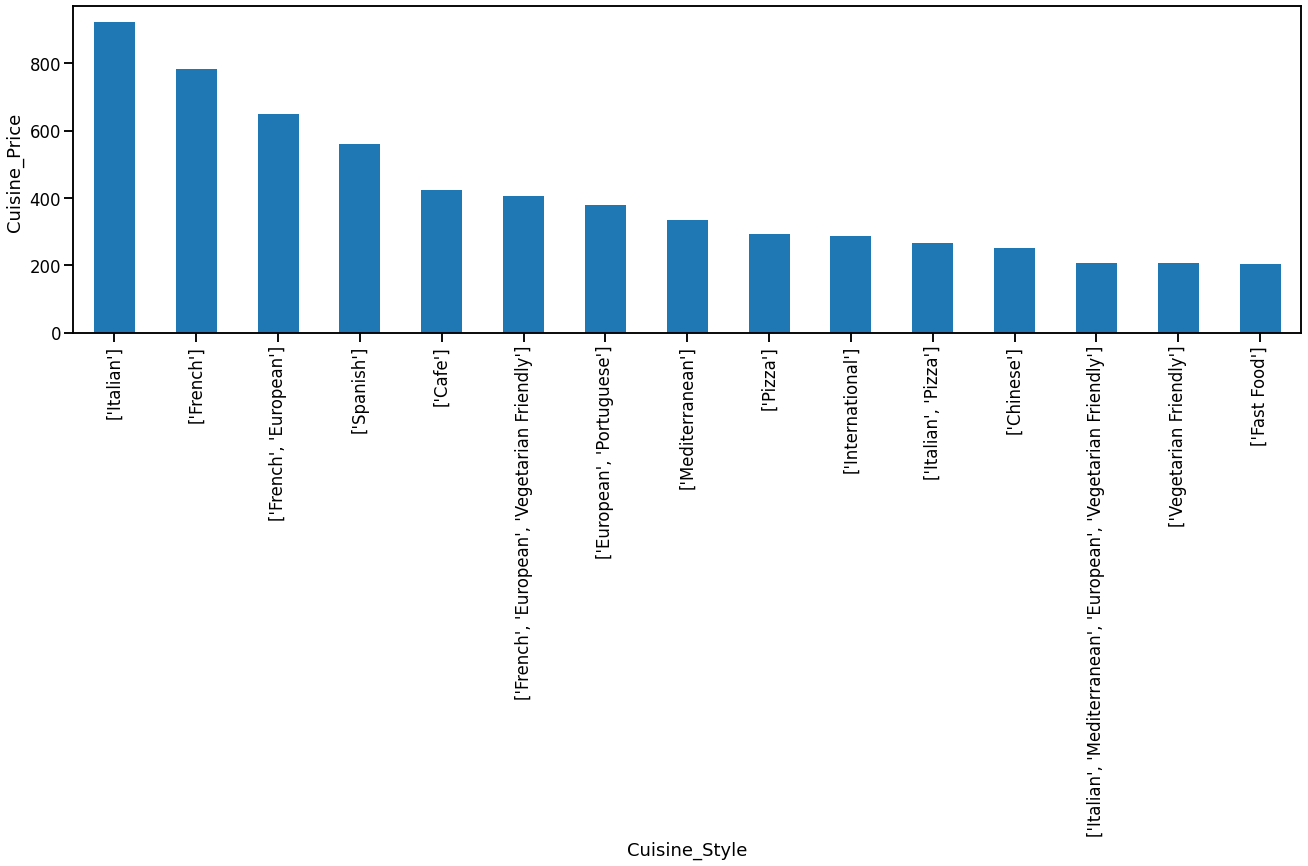

In [ ]:
Cuisine_Price = DataSet.groupby(['Cuisine Style'])['new_Price'].sum().nlargest(20)
print("Cuisine_vs_Price \n")
print(Cuisine_Price)
plot.figure(figsize=(22,6))
GraphData=DataSet.groupby(['Cuisine Style'])['new_Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plot.ylabel('Price ')
plot.xlabel('Cuisine_Style')